In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
register_matplotlib_converters()

import yfinance as yf
import datetime

import seaborn as sns
plt.style.use('seaborn')

In [2]:
df_ice_cream = pd.read_csv('ice_cream.csv')

In [3]:
df_ice_cream.rename(columns = {'Date':'date','IPN31152N':'production'},inplace = True) 

In [4]:
df_ice_cream['DATE'] = pd.to_datetime(df_ice_cream.DATE)

In [5]:
df_ice_cream.set_index('DATE',inplace = True)

In [6]:
start_date = pd.to_datetime('2010-01-01')


In [7]:
df_ice_cream = df_ice_cream[start_date:]

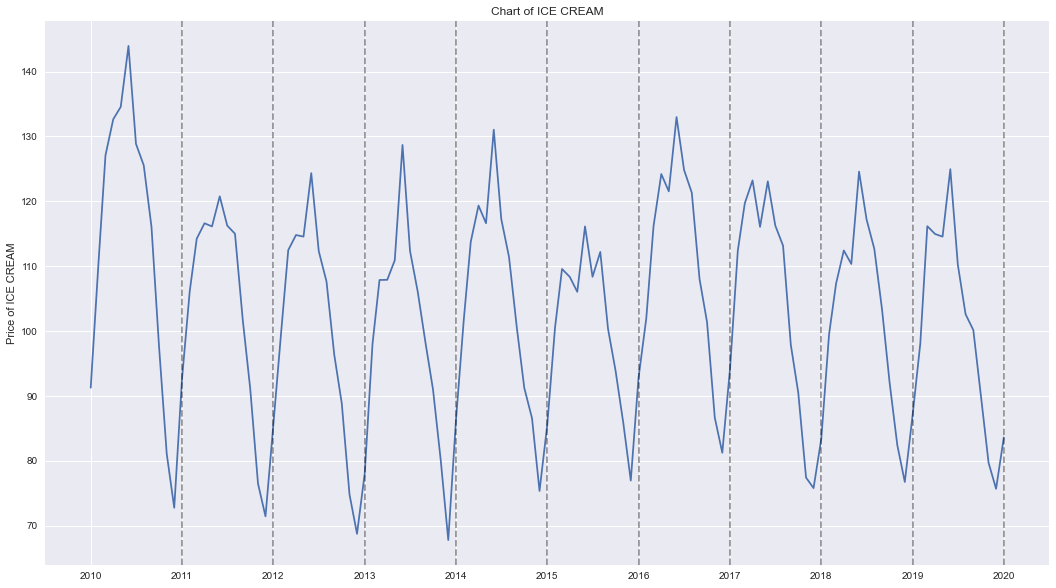

In [8]:
plt.figure(figsize = (18,10))
plt.plot(df_ice_cream)
plt.title(f"Chart of ICE CREAM")
plt.ylabel("Price of ICE CREAM")

for year in range(2011,2021):
    plt.axvline(pd.to_datetime(str(year)),alpha = 0.4,color = 'k',linestyle = "--")

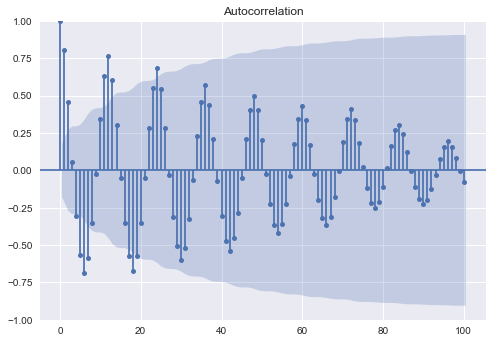

In [9]:
acf = plot_acf(df_ice_cream.production,lags = 100)

C:\Users\rajpu\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


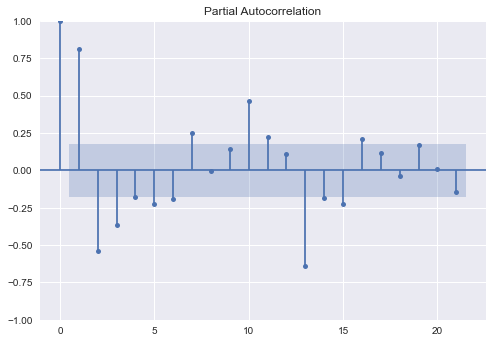

In [10]:
pacf = plot_pacf(df_ice_cream.production)

In [11]:
start = datetime.date(2011,1,1)
end = datetime.date(2022,1,1)
ticker = "KO"

In [12]:
ko = yf.download(tickers = ticker, start = start,end=end)

[*********************100%***********************]  1 of 1 completed


In [13]:
ko_close = ko['Close']

In [14]:
ko_close

Date
2010-12-31    32.884998
2011-01-03    32.610001
2011-01-04    31.934999
2011-01-05    31.745001
2011-01-06    31.514999
                ...    
2021-12-27    58.650002
2021-12-28    58.880001
2021-12-29    58.950001
2021-12-30    58.779999
2021-12-31    59.209999
Name: Close, Length: 2770, dtype: float64

In [15]:
ko_close = ko_close.to_frame()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


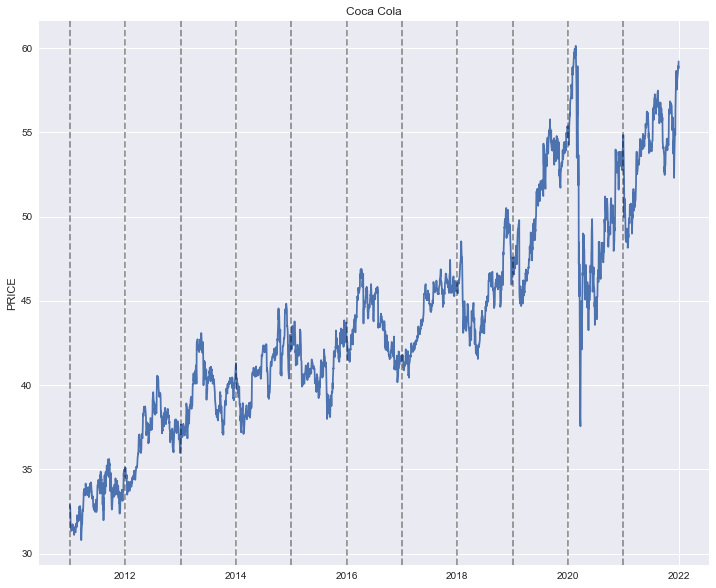

In [16]:
plt.figure(figsize = (12,10))
plt.plot(ko_close)
plt.title('Coca Cola')
plt.ylabel('PRICE')
plt.legend(loc = 'best')


for time in range(start.year,end.year):
    plt.axvline(pd.to_datetime(str(time)+'-01-01'),color = 'k',linestyle = '--',alpha = 0.4)

In [17]:
#take first difference
first_diffs = ko_close.Close.values[1:] - ko_close.Close.values[:-1]
first_diffs = np.concatenate([first_diffs, [0]])

In [19]:
#set first difference as variable in dataframe
ko_close['FirstDifference'] = first_diffs

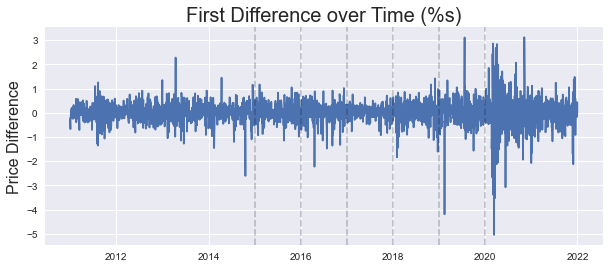

In [22]:
plt.figure(figsize=(10,4))
plt.plot(ko_close.FirstDifference)
plt.title('First Difference over Time (%s)', fontsize=20)
plt.ylabel('Price Difference', fontsize=16)
for year in range(2015,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [24]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf

C:\Users\rajpu\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


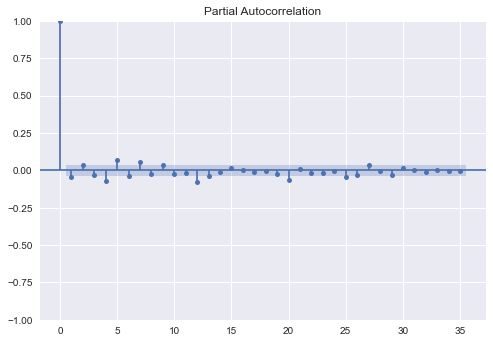

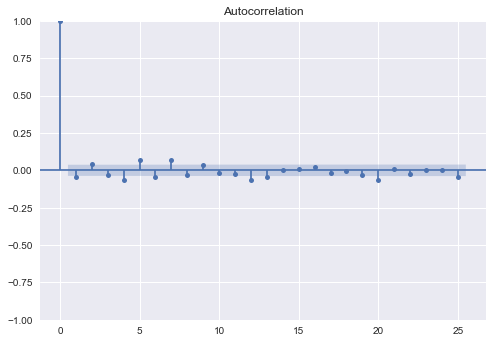

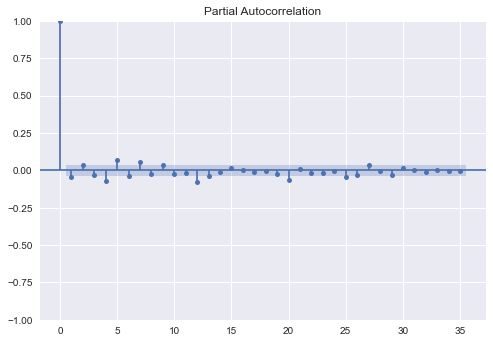

In [30]:
sm.graphics.tsa.plot_acf(ko_close.FirstDifference,lags = 25)
sm.graphics.tsa.plot_pacf(ko_close.FirstDifference)